In [1]:
import tensorflow as tf
import cv2 as cv
import imghdr
import os

In [21]:
data = '/content/sample_data/Data'

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
data = '/content/drive/MyDrive/ds/Happy-Sad'

In [27]:
os.listdir(data)

['sad', 'happy']

In [28]:
ext = ['jpg', 'jpeg', 'png', 'bmp']
ext

['jpg', 'jpeg', 'png', 'bmp']

In [29]:
for classes in os.listdir(data):
  for img in os.listdir(os.path.join(data, classes)):
    img_path = os.path.join(data, classes, img)
    try:
      img = cv.imread(img_path)
      tip = imghdr.what(img_path)
      if tip not in ext:
        print('Image not in {}'.format(img_path))
        os.remove(img)
    except Exception as e:
      print('Issue with image {}'.format(img_path))

# **Load Data**

In [30]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
tf.keras.utils.image_dataset_from_directory??

In [32]:
# Generate data from image files in a directory.
data = tf.keras.utils.image_dataset_from_directory(data)
data

Found 304 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# **Preprocess Images**

In [33]:
# scale data
data = data.map(lambda x,y: (x/255, y))

In [34]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [35]:
batch[0].shape

(32, 256, 256, 3)

In [36]:
batch[1]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int32)

# **Visualize Data**

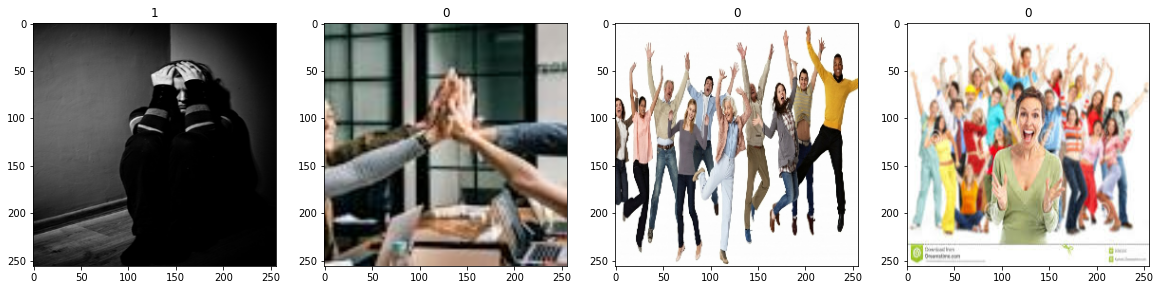

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#**Split Data**

In [38]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [39]:
train = data.take(len(data))
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [41]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [59]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
10/10 [==============================] - 29s 2s/step - loss: 0.1673 - accuracy: 0.9342 - val_loss: 0.2370 - val_accuracy: 0.9688
Epoch 2/20
10/10 [==============================] - 29s 2s/step - loss: 0.1714 - accuracy: 0.9572 - val_loss: 0.0988 - val_accuracy: 0.9844
Epoch 3/20
10/10 [==============================] - 29s 3s/step - loss: 0.0462 - accuracy: 0.9901 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 29s 3s/step - loss: 0.0144 - accuracy: 0.9967 - val_loss: 0.0245 - val_accuracy: 0.9844
Epoch 5/20
10/10 [==============================] - 33s 3s/step - loss: 0.0125 - accuracy: 0.9934 - val_loss: 0.0208 - val_accuracy: 0.9844
Epoch 6/20
10/10 [==============================] - 33s 3s/step - loss: 0.0131 - accuracy: 0.9967 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 33s 3s/step - loss: 0.0085 - accuracy: 0.9934 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 8/20
10/10 [==

#**Plot Results**

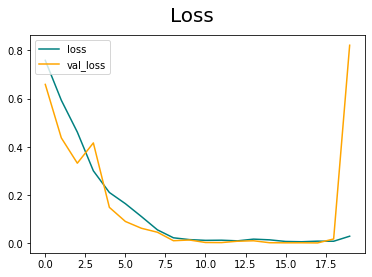

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

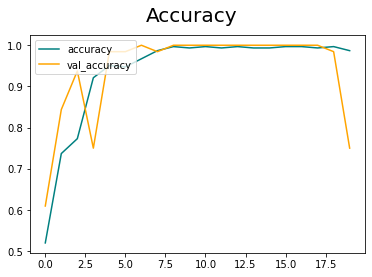

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()